In [1723]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import datetime
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar
from sklearn import linear_model
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score
import time
import cPickle as pickle

%load_ext autoreload
%autoreload 2
from functions import *
from plots import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import Data

In [1834]:
df = pd.DataFrame.from_csv('../data_ski_in_solitude/all_feat.csv', parse_dates=True, index_col=0)

#### Drop 'to' and 'from' traffic columns

In [1835]:
df.drop(['away_WP', 'to_WP'], axis=1, inplace=True)

#### Fill the NaNs to scale data

In [1836]:
df.fillna(df_all.mean(), inplace=True)

skiers     new_24  basedepth  open_trails  open_lifts  \
2011-11-13    44.000000   1.000000  18.000000     0.000000    0.000000   
2011-11-14 -1467.000000   1.000000  18.000000     0.000000    0.000000   
2011-11-15 -1580.000000   1.000000  18.000000     0.000000    0.000000   
2011-11-16 -1315.000000   1.000000  18.000000     0.000000    0.000000   
2011-11-17 -1202.000000   1.000000  18.000000     0.000000    0.000000   
2011-11-18 -1176.000000   0.000000  18.000000     0.000000    0.000000   
2011-11-19    23.000000   1.000000  18.000000     0.000000    0.000000   
2011-11-20   738.000000   4.000000  18.000000     0.000000    0.000000   
2011-11-21  -546.000000   0.000000  18.000000     0.000000    0.000000   
2011-11-22  -635.000000   2.000000  18.000000     0.000000    0.000000   
2011-11-23  -265.000000   0.000000  18.000000     0.000000    0.000000   
2011-11-24  1369.000000   0.000000  18.000000     0.000000    0.000000   
2011-11-25  2162.000000   0.000000  18.000000     0.000000    0.000000   
2011-11-26  3350.000000   3.000000  18.000000     0.000000    0.000000   
2011-11-27   321.000000   0.000000  18.000000     0.000000    0.000000   
2011-11-28   -85.000000   0.000000  18.000000     0.000000    0.000000   
2011-11-29   -62.000000   0.000000  18.000000     0.000000    0.000000   
2011-11-30   -21.000000   0.000000  18.000000     0.000000    0.000000   
2011-12-01   133.000000   0.000000  18.000000     0.000000    0.000000   
2011-12-02  1759.000000   0.000000  18.000000     0.000000    0.000000   
2011-12-03  2087.000000   0.000000  18.000000     0.000000    0.000000   
2011-12-04   362.000000   3.000000  18.000000     0.000000    0.000000   
2011-12-05   242.000000   1.000000  18.000000     0.000000    0.000000   
2011-12-06   237.000000   0.000000  18.000000    18.000000    6.000000   
2011-12-07   265.000000   0.000000  18.000000    17.000000    6.000000   
2011-12-08   516.000000   0.000000  18.000000    17.000000    6.000000   
2011-12-09  1978.000000   1.000000  18.000000    19.000000    6.000000   
2011-12-10  2203.000000   0.000000  18.000000    21.000000    8.000000   
2011-12-11   493.000000   0.000000  18.000000    21.000000    7.000000   
2011-12-12   328.000000   0.000000  18.000000    21.000000    6.000000   
2011-12-13   352.000000   0.000000  18.000000    22.000000    8.000000   
2011-12-14   374.000000   1.000000  18.000000    23.000000    8.000000   
2011-12-15   651.000000   3.000000  21.000000    23.000000    8.000000   
2011-12-16  2421.000000   0.000000  21.000000    32.000000   12.000000   
2011-12-17  3376.000000   0.000000  21.000000    31.000000   13.000000   
2011-12-18  2558.000000   0.000000  21.000000    34.000000   14.000000   
2011-12-19  2416.000000   0.000000  21.000000    37.000000   14.000000   
2011-12-20  2628.000000   0.000000  21.000000    37.000000   13.000000   
2011-12-21  2657.000000   0.000000  21.000000    37.000000   13.000000   
2011-12-22  3063.000000   6.000000  26.000000    38.000000   13.000000   
2011-12-23  3928.000000   0.000000  26.000000    42.000000   13.000000   
2011-12-24  4374.000000   0.000000  26.000000    42.000000   14.000000   
2011-12-25  4930.000000   0.000000  26.000000    42.000000   14.000000   
2011-12-26  5818.000000   0.000000  26.000000    54.000000   14.000000   
2011-12-27  6219.000000   0.000000  26.000000    58.000000   15.000000   
2011-12-28  6622.000000   0.000000  26.000000    65.000000   15.000000   
2011-12-29  7044.000000   0.000000  26.000000    67.000000   15.000000   
2011-12-30  8052.000000   0.000000  26.000000    56.000000   14.000000   
2011-12-31  8097.000000   0.000000  26.000000    55.000000   14.000000   
2012-01-01  5067.000000   4.000000  28.000000    55.000000   14.000000   
2012-01-02  2066.000000   0.000000  28.000000    56.000000   14.000000   
2012-01-03  1436.000000   0.000000  28.000000    63.000000   15.000000   
2012-01-04  1405.000000   0.000000  28.000000    63.000000   15.000000   
2012-01-05  1536.0000

#### Get a list of the features

In [1859]:
features = list(df_all.columns[1:].values)

#### Scale the data

In [1840]:
df_sc, standard_scale_fit = scale_features(df[features])
df_final = pd.concat([df.skiers, df_sc], axis=1)
df_final.head()

skiers    new_24  basedepth  open_trails  open_lifts  \
2011-11-13      44 -0.273109  -1.600583    -2.264483   -2.786694   
2011-11-14   -1467 -0.273109  -1.600583    -2.264483   -2.786694   
2011-11-15   -1580 -0.273109  -1.600583    -2.264483   -2.786694   
2011-11-16   -1315 -0.273109  -1.600583    -2.264483   -2.786694   
2011-11-17   -1202 -0.273109  -1.600583    -2.264483   -2.786694   

            open_percent  tot_snow  week_snow_tot  2day_snow_tot  \
2011-11-13     -2.055275 -1.459053      -0.269834      -0.175318   
2011-11-14     -2.055275 -1.425871      -0.269834      -0.351279   
2011-11-15     -2.055275 -1.425871      -0.269834      -0.351279   
2011-11-16     -2.055275 -1.414810      -0.269834      -0.351279   
2011-11-17     -2.055275 -1.403749      -0.269834      -0.351279   

            3day_snow_tot        ...          new_years_sat   mlk_sat  \
2011-11-13      -0.202770        ...              -0.049875 -0.035245   
2011-11-14      -0.202770        ...              -0.049875 -0.035245   
2011-11-15      -0.408778        ...              -0.049875 -0.035245   
2011-11-16      -0.408778        ...              -0.049875 -0.035245   
2011-11-17      -0.408778        ...              -0.049875 -0.035245   

            new_years_sun   mlk_sun  new_years_fri   mlk_fri  new_years_mon  \
2011-11-13      -0.049875 -0.035245      -0.049875 -0.035245      -0.035245   
2011-11-14      -0.049875 -0.035245      -0.049875 -0.035245      -0.035245   
2011-11-15      -0.049875 -0.035245      -0.049875 -0.035245      -0.035245   
2011-11-16      -0.049875 -0.035245      -0.049875 -0.035245      -0.035245   
2011-11-17      -0.049875 -0.035245      -0.049875 -0.035245      -0.035245   

             mlk_mon  spring_break  spring_break_ends  
2011-11-13 -0.035245     -0.171389            -0.0936  
2011-11-14 -0.035245     -0.171389            -0.0936  
2011-11-15 -0.035245     -0.171389            -0.0936  
2011-11-16 -0.035245     -0.171389            -0.0936  
2011-11-17 -0.035245     -0.171389            -0.0936  

[5 rows x 42 columns]

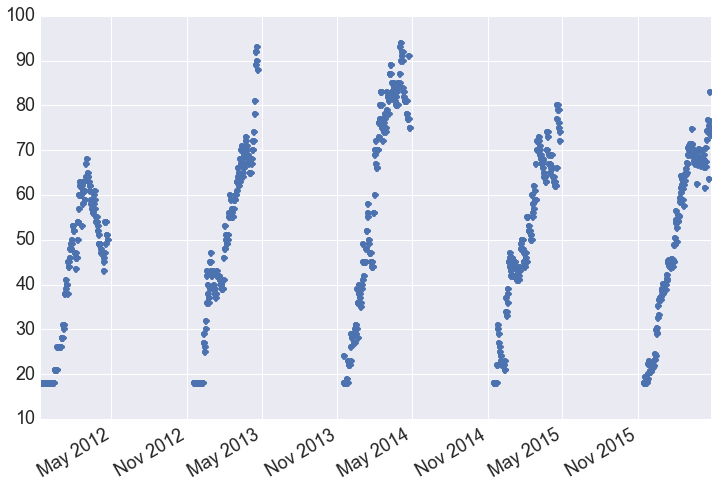

In [1842]:
df.basedepth.plot(linestyle='', marker='o')

### Create a training and holdout set

In [1860]:
df_tr = df[df.index < datetime.datetime(2014,11,1)]
df_h = df.ix[datetime.datetime(2014,11,1):datetime.datetime(2015,5,1)]
df_fut = df.ix[datetime.datetime(2011,5,1):]

In [1861]:
df_tr.head()

skiers  new_24  basedepth  open_trails  open_lifts  open_percent  \
2011-11-13      44       1         18            0           0             0   
2011-11-14   -1467       1         18            0           0             0   
2011-11-15   -1580       1         18            0           0             0   
2011-11-16   -1315       1         18            0           0             0   
2011-11-17   -1202       1         18            0           0             0   

            tot_snow  week_snow_tot  2day_snow_tot  3day_snow_tot  \
2011-11-13         1            9.1            2.6            3.9   
2011-11-14         4            9.1            2.0            3.9   
2011-11-15         4            9.1            2.0            3.0   
2011-11-16         5            9.1            2.0            3.0   
2011-11-17         6            9.1            2.0            3.0   

                  ...          new_years_sat  mlk_sat  new_years_sun  mlk_sun  \
2011-11-13        ...                      0        0              0        0   
2011-11-14        ...                      0        0              0        0   
2011-11-15        ...                      0        0              0        0   
2011-11-16        ...                      0        0              0        0   
2011-11-17        ...                      0        0              0        0   

            new_years_fri  mlk_fri  new_years_mon  mlk_mon  spring_break  \
2011-11-13              0        0              0        0             0   
2011-11-14              0        0              0        0             0   
2011-11-15              0        0              0        0             0   
2011-11-16              0        0              0        0             0   
2011-11-17              0        0              0        0             0   

            spring_break_ends  
2011-11-13                  0  
2011-11-14                  0  
2011-11-15                  0  
2011-11-16                  0  
2011-11-17                  0  

[5 rows x 42 columns]

## Forward selection

In [1862]:
lin_regr = linear_model.LinearRegression()

In [1868]:
features

['new_24',
 'basedepth',
 'open_trails',
 'open_lifts',
 'open_percent',
 'tot_snow',
 'week_snow_tot',
 '2day_snow_tot',
 '3day_snow_tot',
 '4day_snow_tot',
 '5day_snow_tot',
 '6day_snow_tot',
 'day_0',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_11',
 'month_12',
 'vet_day',
 'thanksgiv',
 'xmas',
 'new_years',
 'mlk_day',
 'pres_day',
 'new_years_sat',
 'mlk_sat',
 'new_years_sun',
 'mlk_sun',
 'new_years_fri',
 'mlk_fri',
 'new_years_mon',
 'mlk_mon',
 'spring_break',
 'spring_break_ends']

In [1863]:
ref_column = 'skiers'
features = list(df_tr.columns.values)
features.remove('skiers')

In [1864]:
X_tr = df_tr[features]
y_tr = df_tr.skiers.values
X_h = df_h[features].values

In [1869]:
leave_out = ['day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'xmas','thanksgiv','spring_break','pres_day']
features_input = [f for f in features if f not in leave_out]

In [1870]:
fs_features, RMSE = forward_selection_lodo(lin_regr, X_tr, y_tr, 25, features_input)

Next best Feature:  open_lifts , RMSE:  1725.1 #: 9
Next best Feature:  month_4 , RMSE:  1551.7 #: 10
Next best Feature:  tot_snow , RMSE:  1544.0 #: 11
Next best Feature:  open_trails , RMSE:  1526.3 #: 12
Next best Feature:  month_3 , RMSE:  1514.0 #: 13
Next best Feature:  new_years , RMSE:  1508.5 #: 14
Next best Feature:  month_11 , RMSE:  1501.9 #: 15
Next best Feature:  month_12 , RMSE:  1479.2 #: 16
Next best Feature:  mlk_sat , RMSE:  1475.3 #: 17
Next best Feature:  mlk_fri , RMSE:  1472.5 #: 18
Next best Feature:  mlk_mon , RMSE:  1470.6 #: 19
Next best Feature:  new_24 , RMSE:  1469.6 #: 20
Next best Feature:  week_snow_tot , RMSE:  1468.5 #: 21
Next best Feature:  3day_snow_tot , RMSE:  1467.1 #: 22
Next best Feature:  basedepth , RMSE:  1466.4 #: 23
Next best Feature:  mlk_day , RMSE:  1465.7 #: 24
Next best Feature:  6day_snow_tot , RMSE:  1465.4 #: 25
Best Features:  ['day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'xmas', 'open_lifts', 'month_4', 'tot_sn

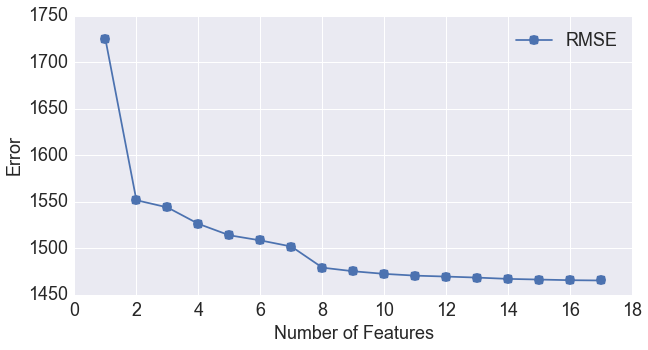

In [1871]:
plot_error_vs_features(RMSE, 'none', 'none')

ERROR! Session/line number was not unique in database. History logging moved to new session 409


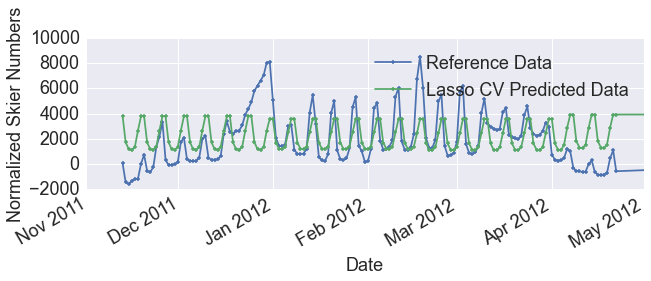

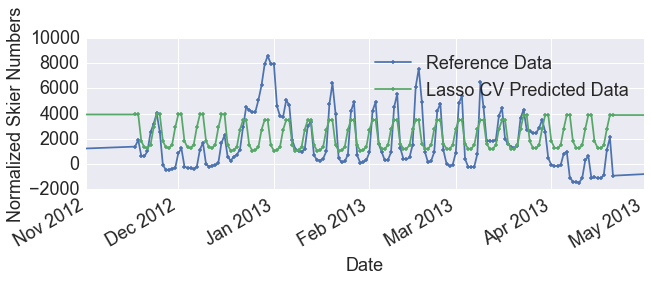

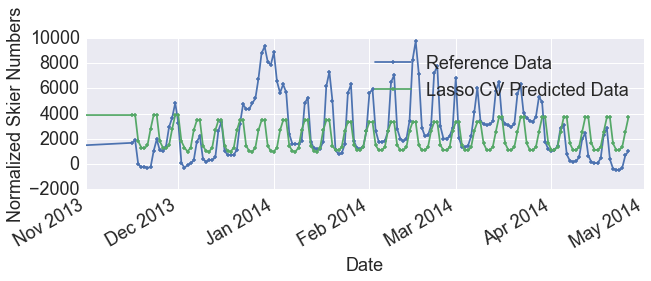

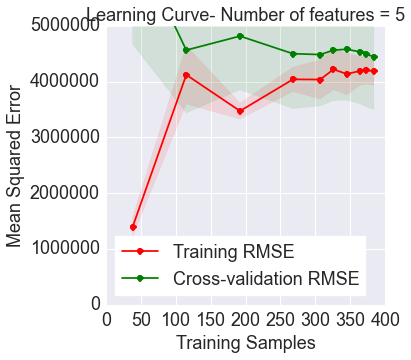

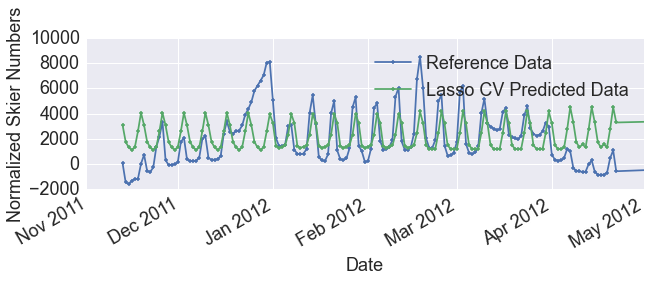

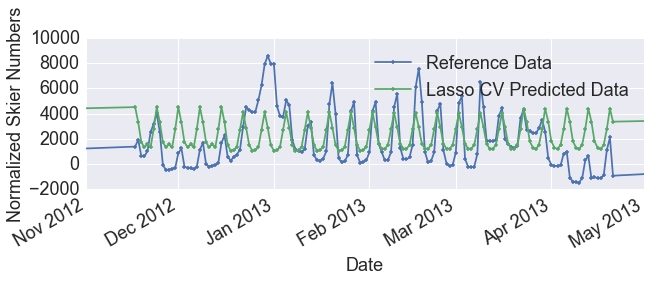

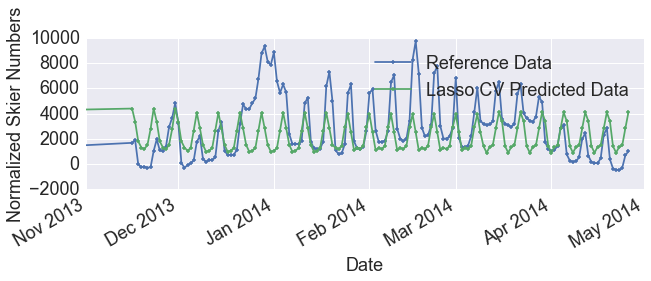

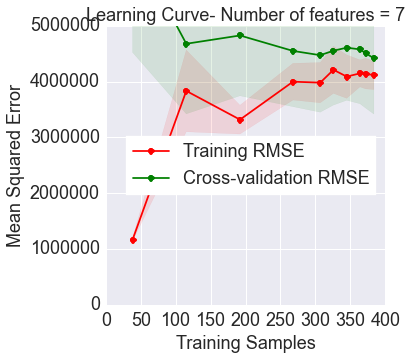

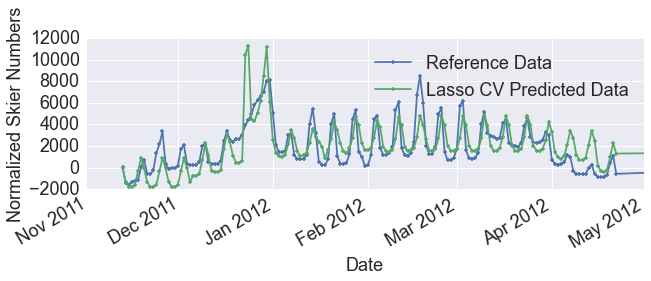

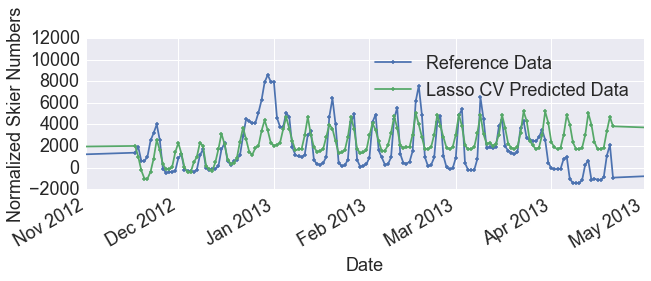

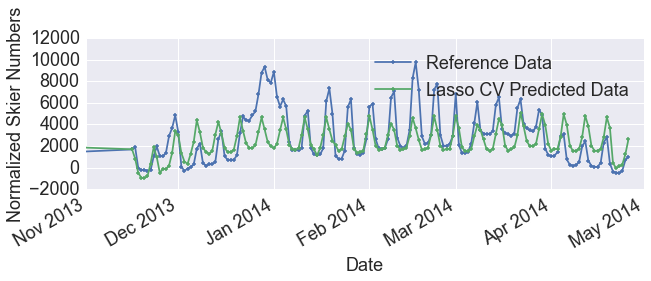

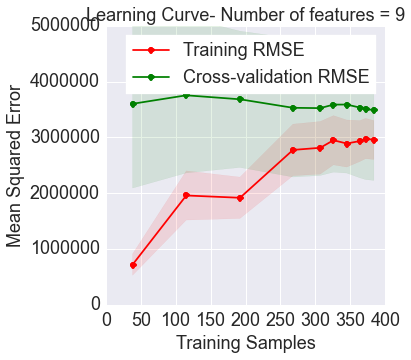

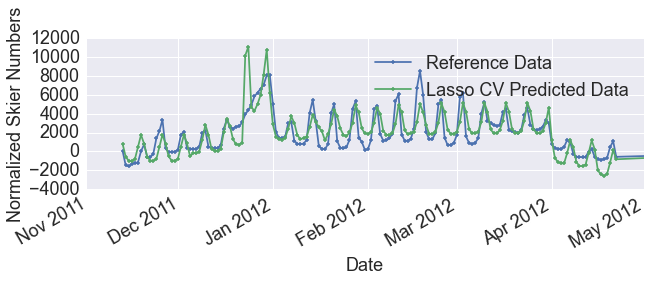

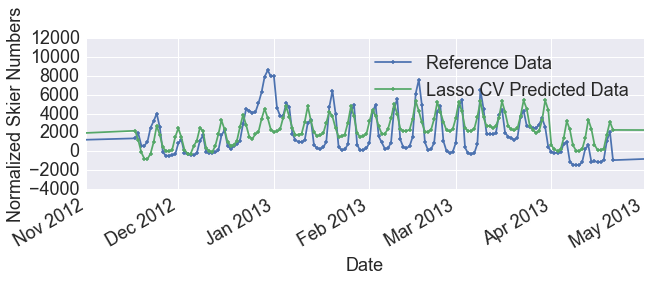

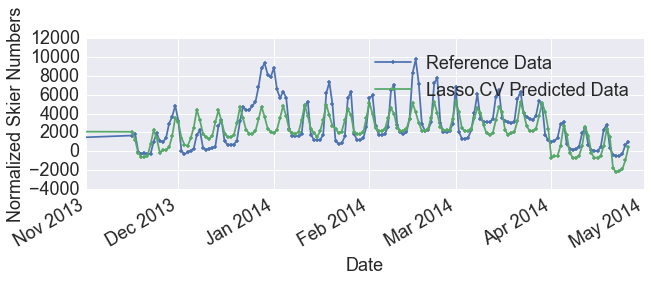

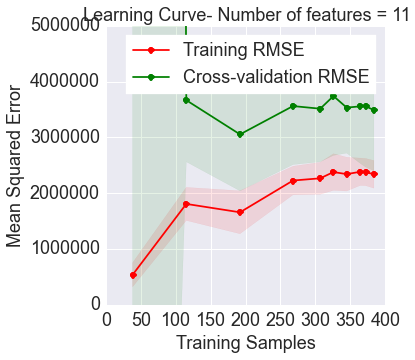

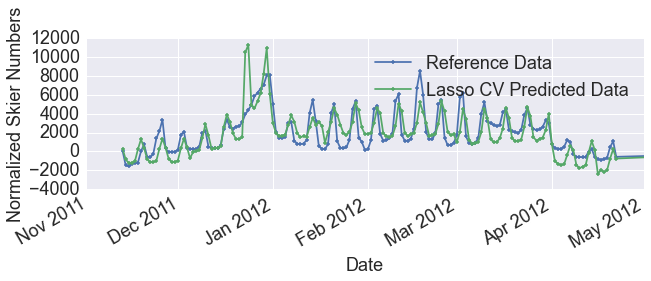

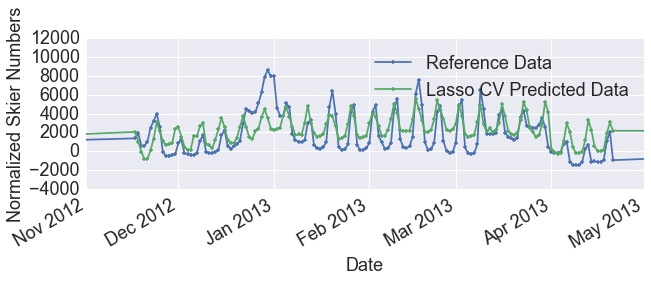

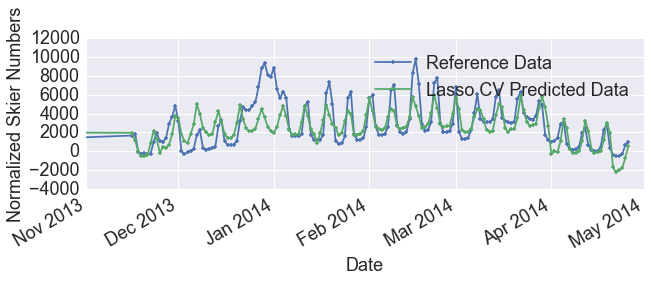

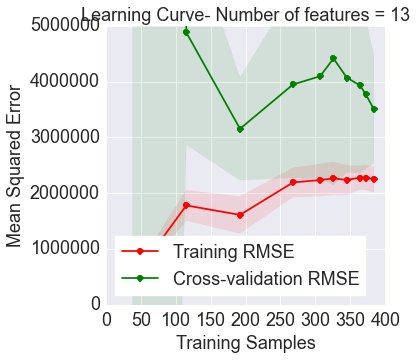

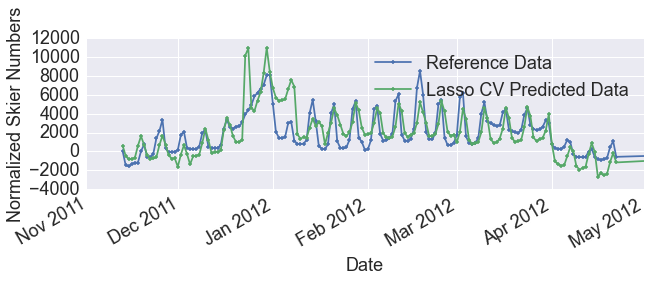

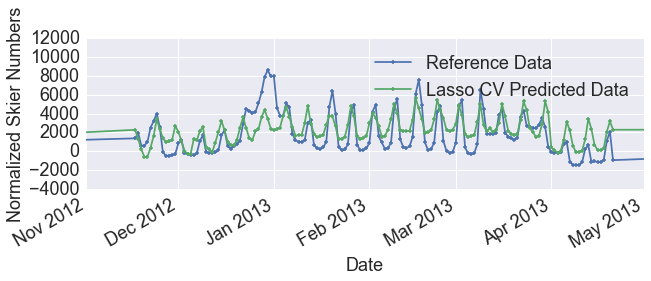

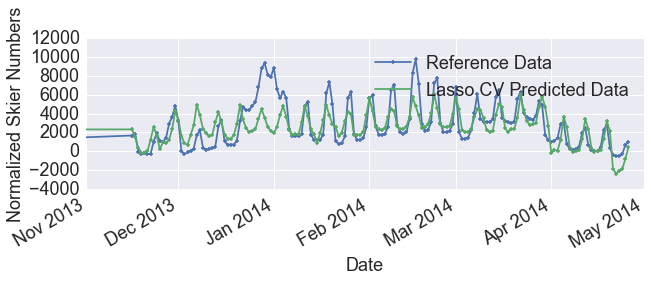

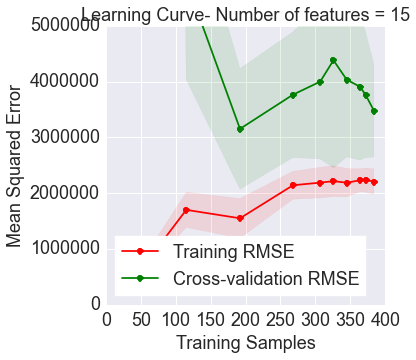

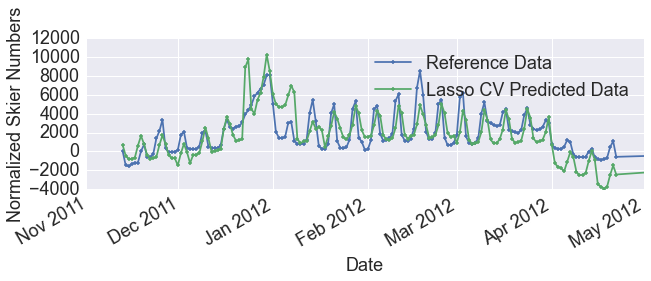

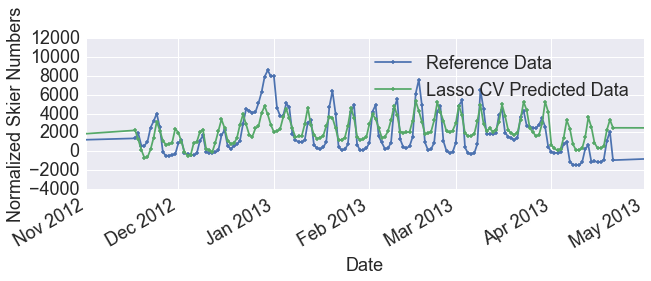

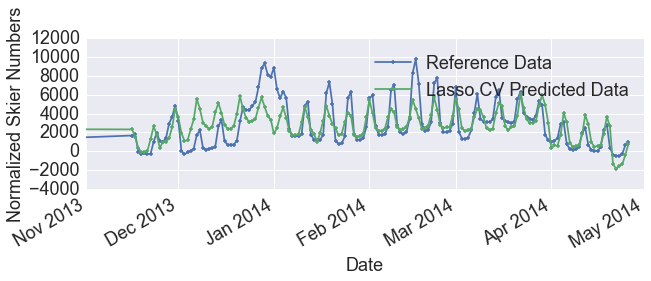

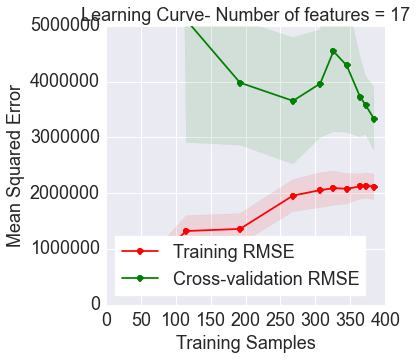

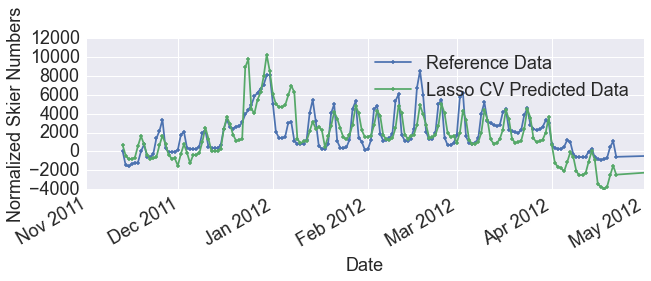

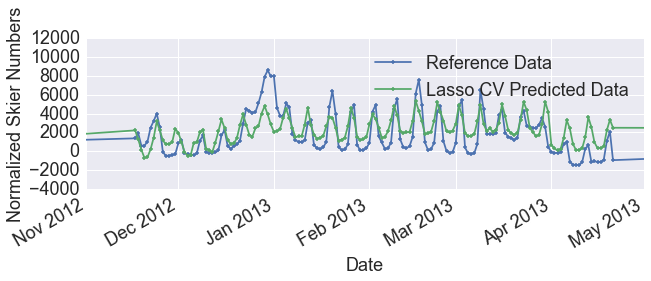

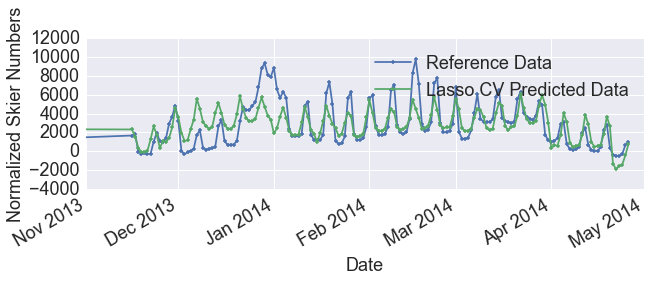

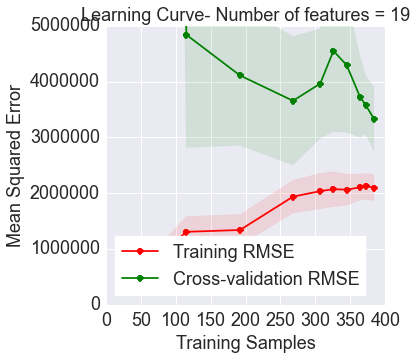

In [1872]:
i = 5
while i < 20:
    num_good_feat = i
    df_reg = pd.concat([df_tr[ref_column], df_tr[fs_features[0:i]]], axis=1)
    X_tr = df_reg[fs_features[0:i]]
    y_tr = df_reg.skiers.values
    mdl = lr.fit(X_tr, y_tr) 
    cv_pred = cross_val_predict(lr, X_tr, y_tr, cv = 10)
    df_reg['cv_pred'] = cv_pred
    plot_fitted_and_ref_vs_time(df_reg, ref_column, ['2011-11-1 00:00:00', '2012-05-1 00:00:00'])
    plot_fitted_and_ref_vs_time(df_reg, ref_column, ['2012-11-1 00:00:00', '2013-05-1 00:00:00'])
    plot_fitted_and_ref_vs_time(df_reg, ref_column, ['2013-11-1 00:00:00', '2014-05-1 00:00:00'])
    plot_learning_curve(lin_regr, "Learning Curve- Number of features = " + str(i), df_tr[fs_features[:i]].values, df_tr[ref_column].values, (0,5000000), 5, np.array([0.1, 0.3, 0.5, 0.7, 0.8, 0.85, 0.9, 0.95,0.97, 1.0]))
    i += 2

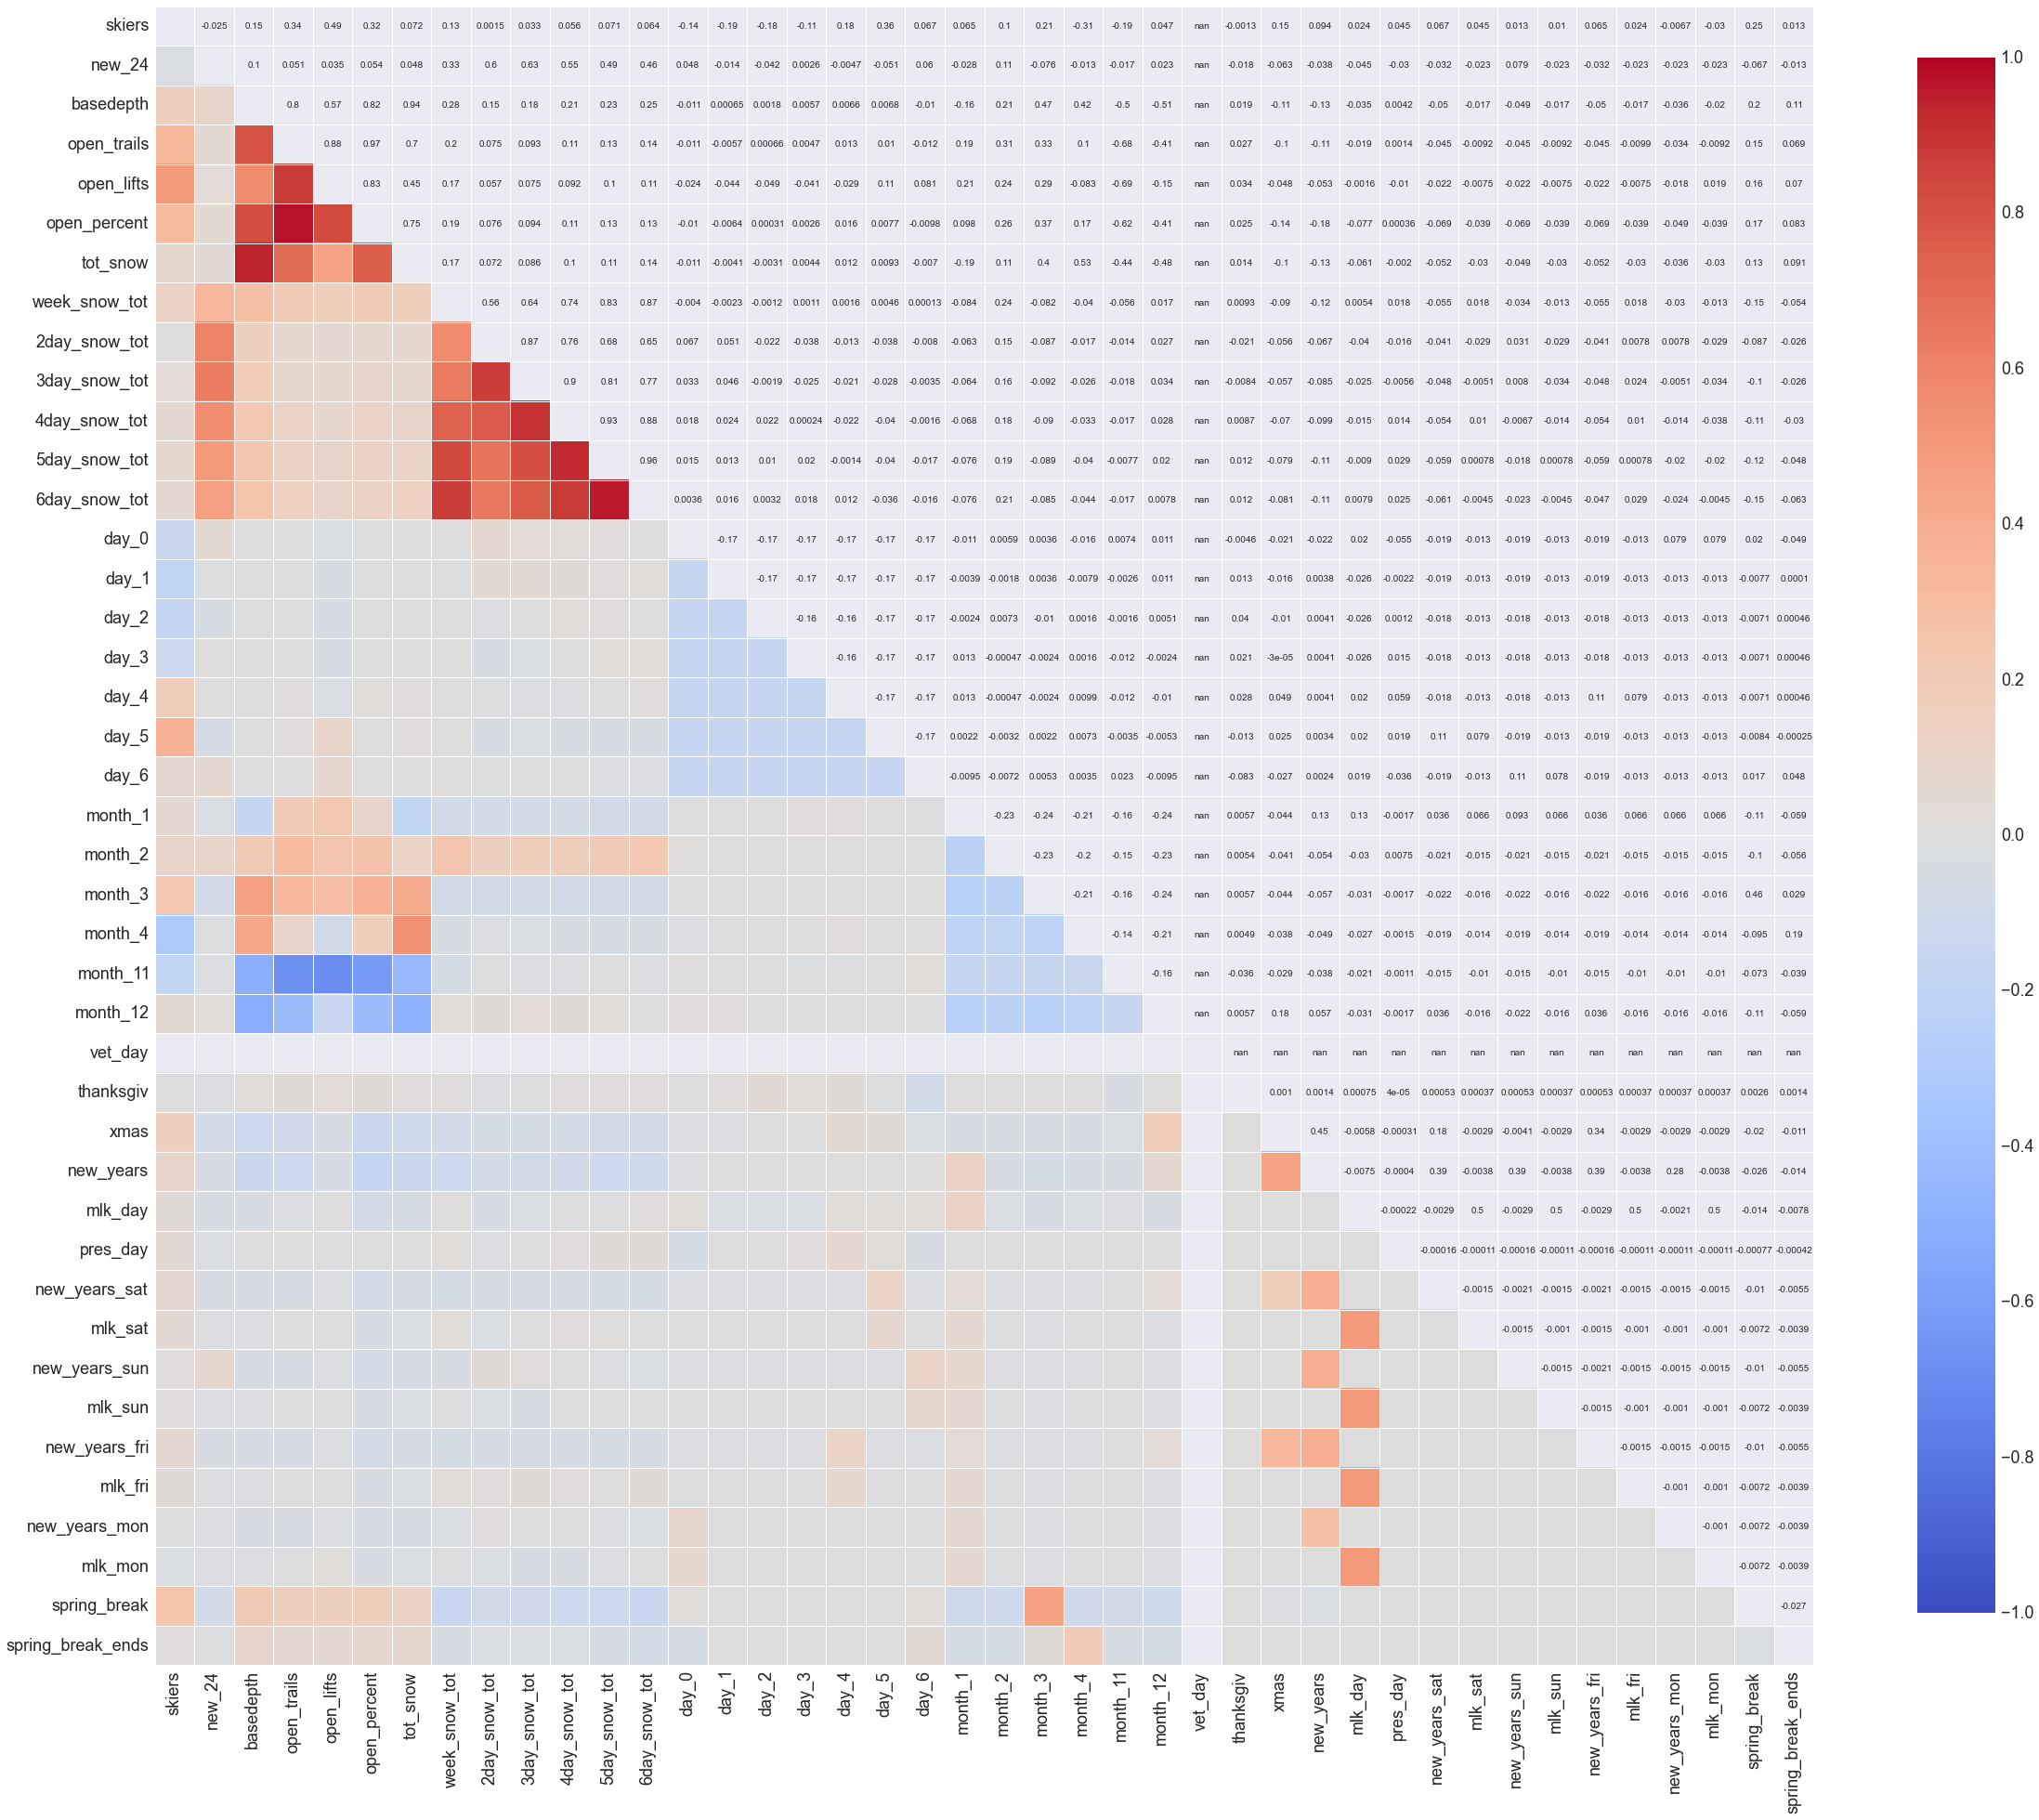

In [1706]:
f, ax = plt.subplots(figsize=(40, 40))
sns.corrplot(df, annot=True, sig_stars=False,
             diag_names=False, ax=ax)

# Linear Regression

In [1811]:
mdl = lr.fit(X_tr, y_tr) 

In [1812]:
cv_pred = cross_val_predict(lr, X_tr, y_tr, cv = 10)

In [1813]:
cv_score = cross_val_score(lr, X_tr, y_tr, cv = 10)

In [1814]:
cv_score.mean()

0.11129876408714827

In [1815]:
clf = linear_model.Lasso(alpha=0.01)
lasso = clf.fit(X_tr, y_tr)
cv_pred_lasso = cross_val_predict(lasso, X_tr, y_tr, cv = 10)

In [1816]:
pred = mdl.predict(X_tr)
df_tr['model_pred'] = pred
df_tr['cv_lin_pred'] = cv_pred
df_tr['lasso_pred'] = cv_pred_lasso

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

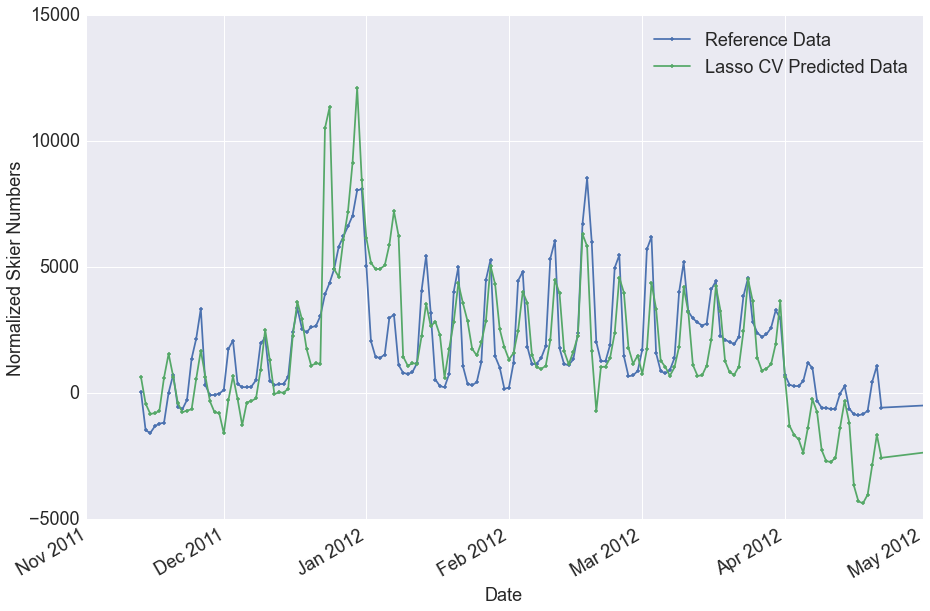

In [1817]:
plot_fitted_and_ref_vs_time(df_tr, ref_column, ['2011-11-1 00:00:00', '2012-05-1 00:00:00'])

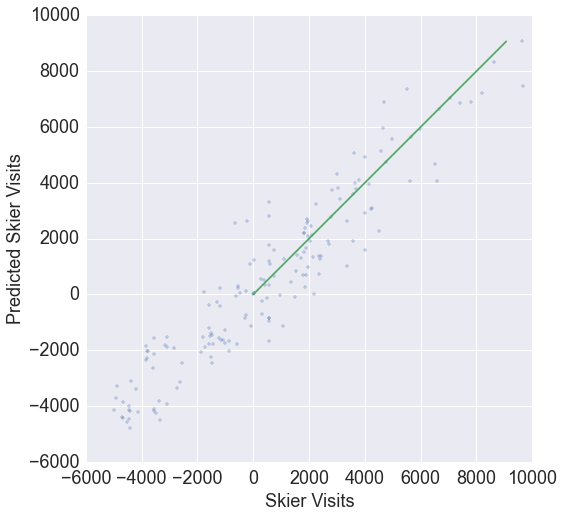

In [1053]:
fitted_vs_ref_plot(df_all, ref_column)

In [782]:
df_all.head()

skiers  freezing_fog  heavy_snow  light_snow      mist  \
2014-11-01 -59.195122      0.000000    0.000000    0.000000  0.000000   
2014-11-02 -59.195122      0.043478    0.014493    0.028986  0.072464   
2014-11-03 -59.195122      0.370968    0.048387    0.096774  0.080645   
2014-11-04 -59.195122      0.000000    0.000000    0.000000  0.013889   
2014-11-05 -59.195122      0.055556    0.000000    0.013889  0.055556   

            thunderstorm_haze  thunderstorm_snow  clear_sky  broken_sky  \
2014-11-01           0.027778           0.000000   0.847222    0.013889   
2014-11-02           0.028986           0.000000   0.507246    0.086957   
2014-11-03           0.000000           0.032258   0.096774    0.096774   
2014-11-04           0.000000           0.000000   0.597222    0.000000   
2014-11-05           0.000000           0.000000   0.694444    0.041667   

            scattered_sky     ...       new_years_fri  mlk_fri  vet_mon  \
2014-11-01       0.138889     ...                   0        0        0   
2014-11-02       0.289855     ...                   0        0        0   
2014-11-03       0.080645     ...                   0        0        0   
2014-11-04       0.000000     ...                   0        0        0   
2014-11-05       0.055556     ...                   0        0        0   

            new_years_mon  mlk_mon  spring_break  spring_break_ends  \
2014-11-01              0        0             0                  0   
2014-11-02              0        0             0                  0   
2014-11-03              0        0             0                  0   
2014-11-04              0        0             0                  0   
2014-11-05              0        0             0                  0   

             model_pred  cv_lin_pred   lasso_pred  
2014-11-01   950.319154  3591.108836  3597.973148  
2014-11-02   293.377511  2986.219794  2995.366507  
2014-11-03   -46.903050  1977.498779  1991.163920  
2014-11-04  1113.756494  3760.787462  3740.533842  
2014-11-05   879.956589  3641.196753  3643.622627  

[5 rows x 55 columns]

### Export Model

In [1342]:
#saving pickle file as .p is best
pickle_out = open('lin_regr.pkl', 'wb')
pickle.dump(mdl, pickle_out)
pickle_out.close()

# Export Data

In [783]:
df_out = df_all.drop(['model_pred','skiers'], axis=1)

In [784]:
df_out.to_csv('../webpage_ski/df_all_features.csv')